In [2]:
import he_burn_core

In [3]:
import pynucastro as pyna

In [4]:
DO_DERIVED_RATES = True

In [5]:
lib = he_burn_core.get_core_library(include_n14_sequence=True,
                                    include_zn=True,
                                    include_iron_peak=True,
                                    include_low_ye=False,
                                    extra_nuclei=["o17", "mg25", "si29", "p30", "s31"],
                                    do_detailed_balance=DO_DERIVED_RATES)

net = pyna.AmrexAstroCxxNetwork(libraries=[lib],
                                symmetric_screening=False)

# now we approximate some (alpha, p)(p, gamma) links

net.make_ap_pg_approx(intermediate_nuclei=["cl35", "k39", "sc43", "v47"])
net.remove_nuclei(["cl35", "k39", "sc43", "v47"])

net.make_nn_g_approx(intermediate_nuclei=["fe53", "fe55", "ni57"])
net.remove_nuclei(["fe53", "fe55", "ni57"])

# make all rates with A >= 48 use NSE protons
net.make_nse_protons(48)

removing:  p31(p,c12)ne20
removing:  si28(a,c12)ne20
removing:  ne20(c12,p)p31
removing:  ne20(c12,a)si28
modifying N13 ⟶ p + C12 from C12 + p ⟶ N13 + 𝛾
modifying O16 ⟶ He4 + C12 from C12 + He4 ⟶ O16 + 𝛾
modifying F18 ⟶ p + O17 from O17 + p ⟶ F18 + 𝛾
modifying F18 ⟶ He4 + N14 from N14 + He4 ⟶ F18 + 𝛾
modifying Ne20 ⟶ He4 + O16 from O16 + He4 ⟶ Ne20 + 𝛾
modifying Ne21 ⟶ He4 + O17 from O17 + He4 ⟶ Ne21 + 𝛾
modifying Na22 ⟶ p + Ne21 from Ne21 + p ⟶ Na22 + 𝛾
modifying Na22 ⟶ He4 + F18 from F18 + He4 ⟶ Na22 + 𝛾
modifying Mg24 ⟶ p + Na23 from Na23 + p ⟶ Mg24 + 𝛾
modifying Mg24 ⟶ He4 + Ne20 from Ne20 + He4 ⟶ Mg24 + 𝛾
modifying Mg25 ⟶ He4 + Ne21 from Ne21 + He4 ⟶ Mg25 + 𝛾
modifying Al27 ⟶ He4 + Na23 from Na23 + He4 ⟶ Al27 + 𝛾
modifying Si28 ⟶ p + Al27 from Al27 + p ⟶ Si28 + 𝛾
modifying Si28 ⟶ He4 + Mg24 from Mg24 + He4 ⟶ Si28 + 𝛾
modifying Si29 ⟶ He4 + Mg25 from Mg25 + He4 ⟶ Si29 + 𝛾
modifying P30 ⟶ p + Si29 from Si29 + p ⟶ P30 + 𝛾
modifying P31 ⟶ He4 + Al27 from Al27 + He4 ⟶ P31 + 𝛾
modifying

In [7]:
print(f"number of nuclei = {len(net.unique_nuclei)}")
print(f"number of ReacLib rates = {len(net.reaclib_rates)}")
print(f"number of derived rates = {len(net.derived_rates)}")
print(f"number of tabular rates = {len(net.tabular_rates)}")
print(f"number of approx rates = {len(net.approx_rates)}")

number of nuclei = 38
number of ReacLib rates = 80
number of derived rates = 70
number of tabular rates = 6
number of approx rates = 14


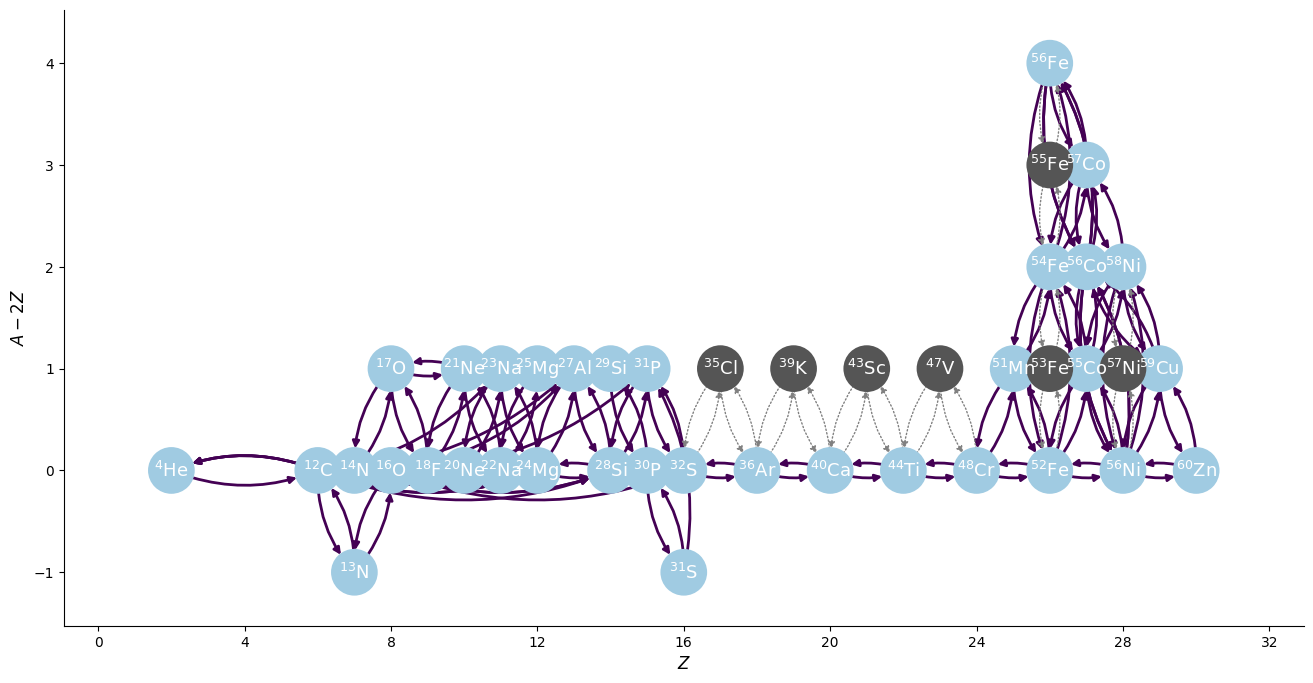

In [8]:
fig = net.plot(rotated=True, hide_xp=True, hide_xalpha=True,
               curved_edges=True,
               size=(1600, 800))

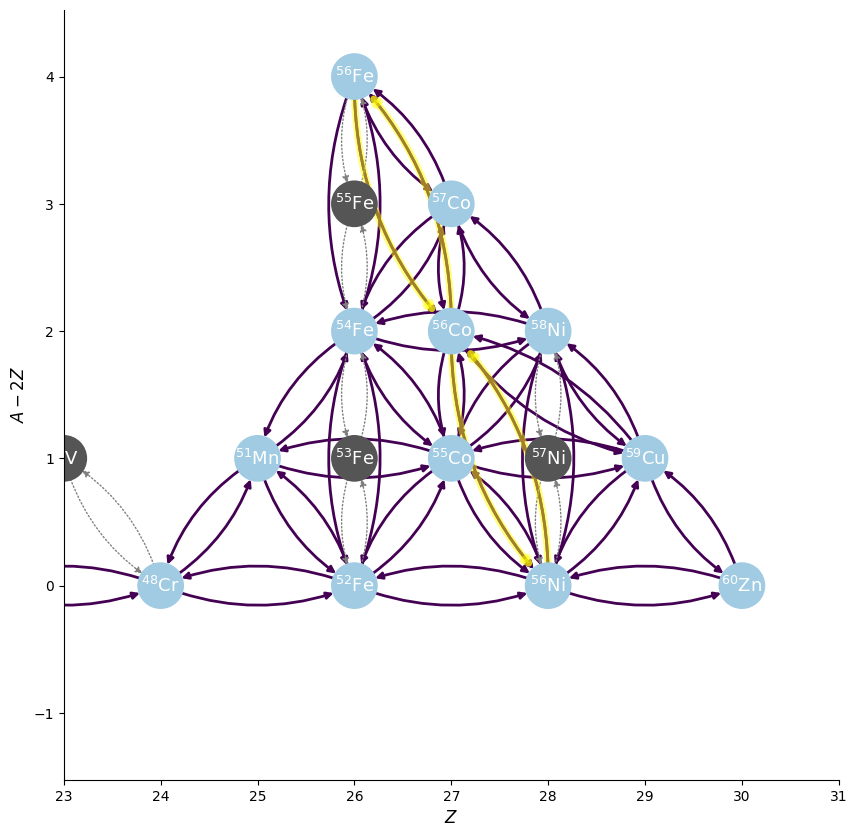

In [9]:
fig = net.plot(rotated=True, hide_xp=True, hide_xalpha=True, curved_edges=True,
               size=(1000, 1000), Z_range=[23, 31], N_range=[-1, 4],
               highlight_filter_function=lambda rate: isinstance(rate, pyna.rates.TabularRate))

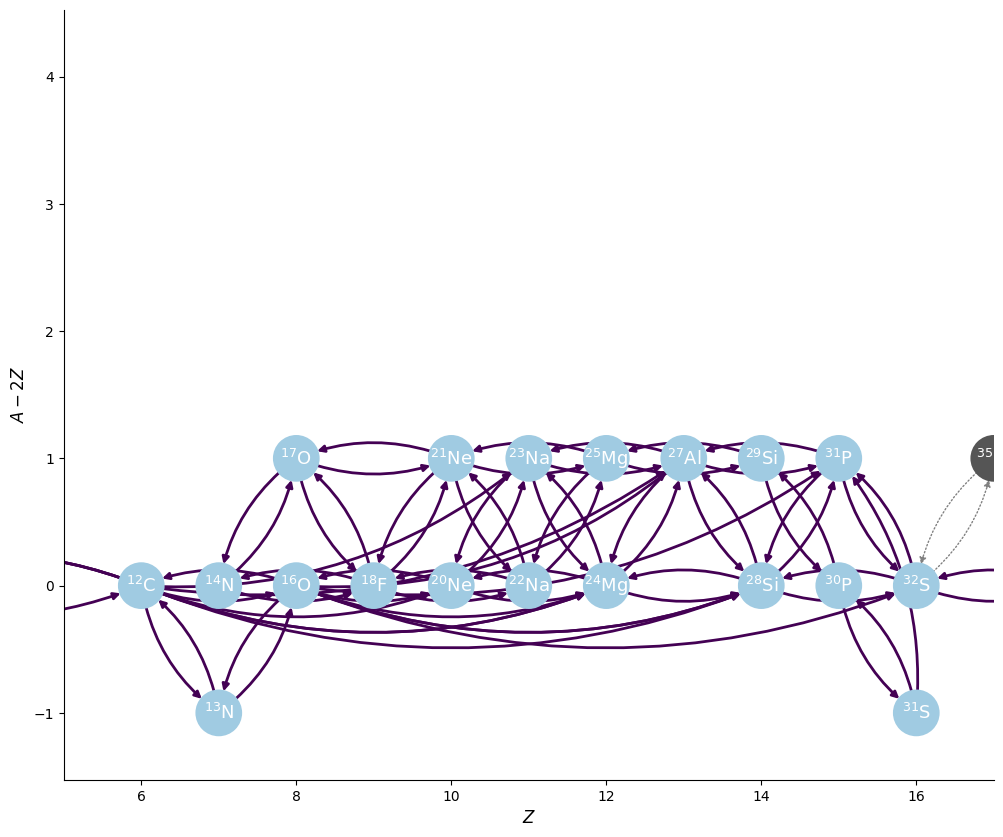

In [10]:
fig = net.plot(rotated=True, hide_xp=True, hide_xalpha=True, curved_edges=True,
               size=(1200, 1000), Z_range=[5, 17], N_range=[-1, 4],
               highlight_filter_function=lambda rate: isinstance(rate, pyna.rates.TabularRate))